<a href="https://colab.research.google.com/github/Omprakash2057/23CSBTB39-40/blob/main/Day_5(2303A52057).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2   

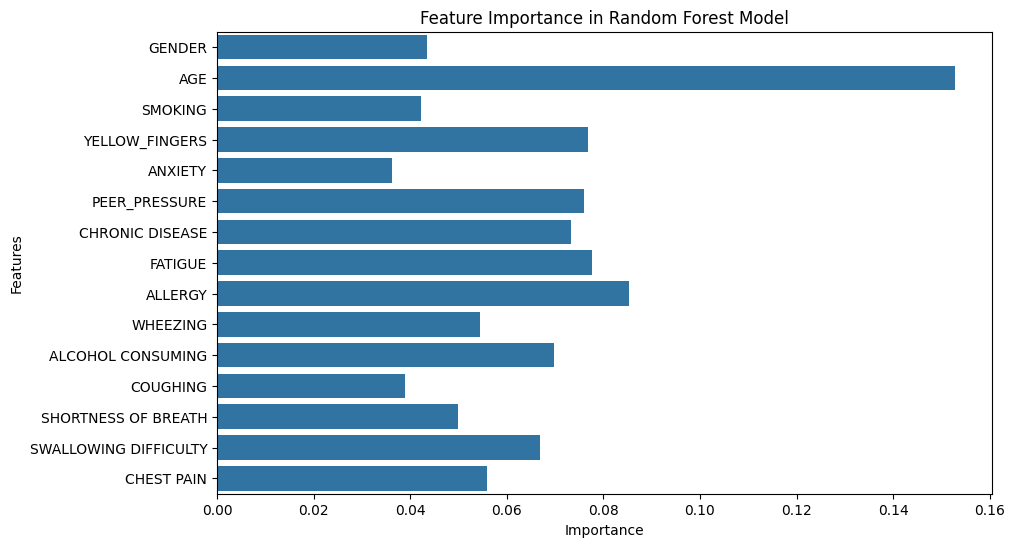

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
file_path = '/content/survey lung cancer.csv'  # Update this with the correct path in Google Colab
data = pd.read_csv(file_path)

# Step 3: Remove any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

# Step 4: Display the first few rows and column names to confirm cleanup
print("First few rows of the dataset:")
print(data.head())
print("\nColumn names:", data.columns)

# Step 5: Check for any missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Step 6: Data Preprocessing - Encoding categorical variables if any exist
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encoding 'GENDER' and 'LUNG_CANCER' columns
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])

# Step 7: Separate features and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Step 8: Split data into training and testing sets (test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Step 9: Initialize the Random Forest Classifier (n_estimators=100, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 10: Train the model
rf_classifier.fit(X_train, y_train)

# Step 11: Make predictions
y_pred = rf_classifier.predict(X_test)

# Step 12: Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 13: Feature importance Graph
feature_importances = rf_classifier.feature_importances_
features = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
